In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
# Function to read the data
def read_mfcc_data(file_path):
    mfcc_blocks = []
    current_block = []
    with open(file_path, 'r') as file:
        # Iterates over each line in the file
        for line in file:
            
            # If the current block is finished, append it to the list of blocks
            if line.strip() == '':
                if current_block:
                    mfcc_blocks.append(current_block)
                    current_block = []
            else:
                # Convert each line to a list of floats (MFCC coefficients)
                frame = list(map(float, line.strip().split()))
                current_block.append(frame)
        # Append the last block if it ends without a blank line
        if current_block:
            mfcc_blocks.append(current_block)
    return mfcc_blocks

In [9]:
# Function to get the blocks for a desired digit
def get_digit_blocks(mfcc_blocks, digit):
    start = digit * 660
    end = start + 660
    
    return mfcc_blocks[start:end]

In [10]:
file_path = './data/Train_Arabic_Digit.txt'
mfcc_blocks = read_mfcc_data(file_path)
data = np.vstack(mfcc_blocks)

In [11]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(data_std)

PCA()

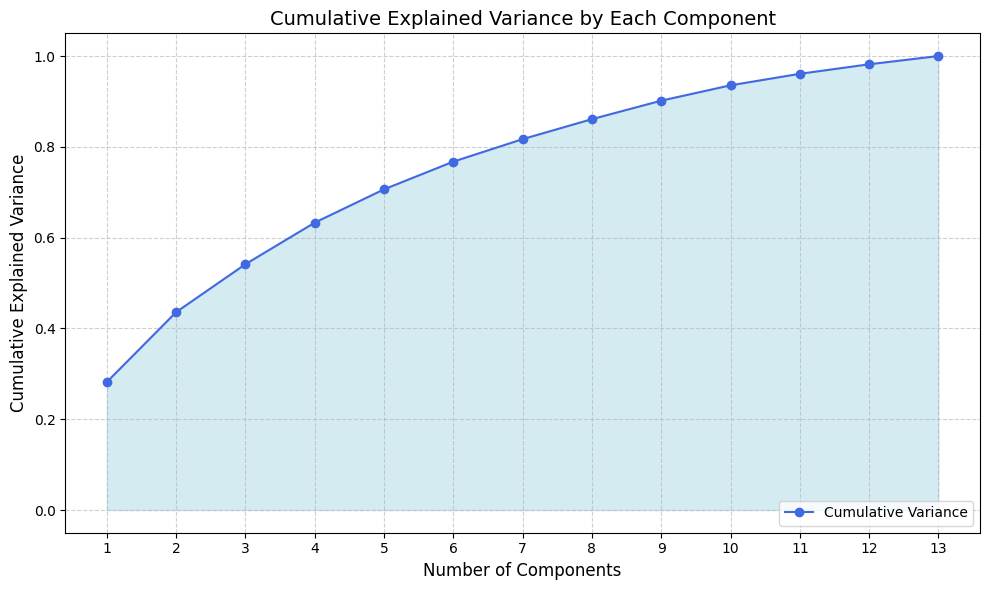

In [ ]:
# Calculate the cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Creating a line plot with shading
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='royalblue', label='Cumulative Variance')
plt.fill_between(range(1, len(cumulative_variance) + 1), cumulative_variance, color='lightblue', alpha=0.5)

# Adding labels, title, and grid
plt.title('Cumulative Variance by Each Component', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(alpha=0.6, linestyle='--')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()